<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/74_C_Datos_DCA2_Manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Tema 1: Diseños Completos Aleatorizados - DCA usando Python: Versión 2**</span>

### <span style="color:green"> **Ejemplo 1.2. (Texto Analisis y Diseno de Experimentos_Humberto-Roman_2da Ed_McGrawHill, pág. 63)**</span>
### <span style="color:blue"> **Problema: _Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva. La suela de los zapatos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérrdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independiente de las demás. Los datos (en mg) sobre el desgaste de cada tipo de cuero se muestran en la tabla siguiente:_.**</span>

### <span style="color:blue">**Tabla de datos**</span>


|Tipos de Cuero|||Desgaste||||
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|A|264|260| 258| 241| 262| 255|
|B|208| 220| 216| 200| 213| 206|
|C|220|263| 219| 225| 230| 228|
|D|217| 226| 215|224| 220| 222|

## **Paso_1. Ingresamos los datos manual**

## **a. Nuestros datos**

In [ ]:
## **1.3 Los datos en Python y definimos el DataFrame: Ingresamos los datos como columnas**
import pandas as pd

Tipo_Cuero = (['A']*6+['B']*6+['C']*6+['D']*6)
Desgaste = [264, 260, 258, 241, 262, 255, 208, 220, 216, 200, 213, 206,
            220, 263, 219, 225, 230, 228, 217, 226, 215, 224, 220, 222]
Datos  = pd.DataFrame({'Tipo_Cuero': Tipo_Cuero, 'Desgaste': Desgaste})
Datos


,Tipo_Cuero,Desgaste
0,A,264
1,A,260
2,A,258
3,A,241
4,A,262
5,A,255
6,B,208
7,B,220
8,B,216
9,B,200


## **b. Otra forma de los datos**

In [ ]:
## **b. Otra forma de los datos**
df = pd.DataFrame(Desgaste,index=Tipo_Cuero, columns=['Desgaste'] )
df

,Desgaste
A,264
A,260
A,258
A,241
A,262
A,255
B,208
B,220
B,216
B,200


## **c. Los tratamientos**

In [ ]:
## **c. Los tratamientos**
df.loc['A'], df.loc['B'], df.loc['C'], df.loc['D']

(   Desgaste
 A       264
 A       260
 A       258
 A       241
 A       262
 A       255,
    Desgaste
 B       208
 B       220
 B       216
 B       200
 B       213
 B       206,
    Desgaste
 C       220
 C       263
 C       219
 C       225
 C       230
 C       228,
    Desgaste
 D       217
 D       226
 D       215
 D       224
 D       220
 D       222)

# **d. Total por tratamiento**

In [ ]:
sum_A = df.loc['A'].sum()
sum_B = df.loc['B'].sum()
sum_C = df.loc['C'].sum()
sum_D = df.loc['D'].sum()
sum_T = sum_A+sum_B+sum_C+sum_D
sum_T


Desgaste    5512
dtype: int64

# **e. Medias por tratamiento**

In [ ]:
media_A = df.loc['A'].mean()
media_B = df.loc['B'].mean()
media_C = df.loc['C'].mean()
media_D = df.loc['D'].mean()


## **e. Gráfico de Caja y Bigotes**

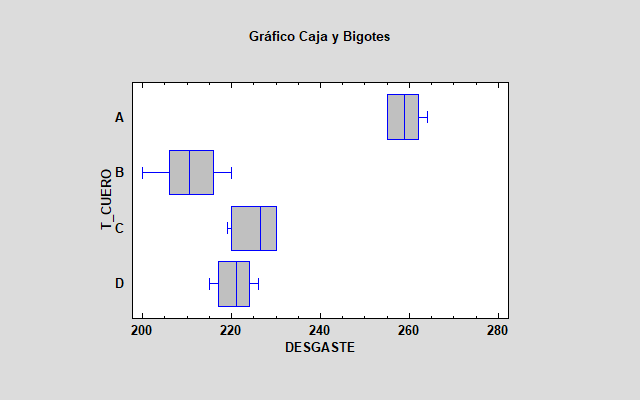

# **Paso_2. Los Estadisticos que debemos calcular**

$$Y_{ij} = μ + τ_i + ϵ_{ij}, \\ i =1, 2, ...,k; j =1, 2, ...,n$$
1.  $Suma(Y_{i.})$, $$Y_{i.} = \sum_{j=1}^{n_i}Y_{ij}; \\ \bar{Y}_{i.}=Y_{i.}/n_i$$
2. $Suma(Y_{..})$,   $$Y_{..} = \sum_{i=1}^{k}\sum_{j=1}^{n_i}Y_{ij}$$
3. Variabilidad de $Total$,   $$SCT = \sum_{i=1}^{k}\sum_{j=1}^{n_i}(Y_{ij}-\bar{Y_{..}})^2=\sum_{i=1}^{k}\sum_{j=1}^{n_i}Y_{ij}^2-\frac{Y_{..}^2}{N}$$

4. Variabilidad de $Tratamientos$,   $$SCTr = \sum_{i=1}^{k}n_i(\bar{Y}_{i.}-\bar{Y_{..}})^2=\sum_{i=1}^{k}\frac{Y_{i.}^2}{n_i}-\frac{Y_{..}^2}{N}$$
5. Variabilidad de $Error$,   $$SCE = \sum_{i=1}^{k}\sum_{j=1}^{n_i}(Y_{ij}-\bar{Y}_{i.})^2=SCT-SCTr$$



# **Paso_3. Calculando Los estadisticos**
## **a. El Total y la media de los tratamientos**

In [ ]:
N = 24; k = 4; n = 6
print(f'suma(A) = {sum_A} y la media(A) = {sum_A/n}')
print(f'suma(B) = {sum_B} y la media(B) = {sum_B/n}')
print(f'suma(C) = {sum_C} y la media(C) = {sum_C/n}')
print(f'suma(D) = {sum_D} y la media(D) = {sum_D/n}')
print(f'suma(T) = {sum_T} y la media(D) = {sum_T/N}')

suma(A) = Desgaste    1540
dtype: int64 y la media(A) = Desgaste    256.666667
dtype: float64
suma(B) = Desgaste    1263
dtype: int64 y la media(B) = Desgaste    210.5
dtype: float64
suma(C) = Desgaste    1385
dtype: int64 y la media(C) = Desgaste    230.833333
dtype: float64
suma(D) = Desgaste    1324
dtype: int64 y la media(D) = Desgaste    220.666667
dtype: float64
suma(T) = Desgaste    5512
dtype: int64 y la media(D) = Desgaste    229.666667
dtype: float64


# **Paso_3. Variabilidad Total y Varianza Total**
## **a. Los cuadrados de Cada Tratamiento**

In [ ]:
sum_Tr2 = sum_A**2+sum_B**2+sum_C**2+sum_D**2
sum_Tr2

Desgaste    7637970
dtype: int64

## **b. La variabilidad total es _SST_ y la Varianza Total _CMT_**

In [ ]:
sumT_2 =(df['Desgaste']*df['Desgaste']).sum()
sumT_2

1275024

In [ ]:
sum_T**2/N

Desgaste    1.265923e+06
dtype: float64

In [ ]:

sumT_2 - sum_T**2/N

Desgaste    9101.333333
dtype: float64

In [ ]:
## **b. La variabilidad total es _SST_ y la Varianza Total _CMT_**
N = 24; k = 4; n = 6
SST = sumT_2 - sum_T**2/N
MST = SST/(N-1)
print(f'La variabilidad total es SST = {SST}')
print(f'La Varianza total es MST = {MST}')

La variabilidad total es SST = Desgaste    9101.333333
dtype: float64
La Varianza total es MST = Desgaste    395.710145
dtype: float64


## **c. La variabilidad de los Tratamientos es _SSTr_ y la Varianza Total _CMTr_**

In [ ]:
## **c. La variabilidad de los Tratamientos es _SSTr_ y la Varianza Total _CMTr_
N = 24; k = 4; n = 6
SSTr = sum_Tr2/n+ - sum_T**2/N

MSTr = SSTr/(k-1)
print(f'La variabilidad de los tratamientos es SSTr = {SSTr}')
print(f'La variabilidad de los tratamientos es MSTr = {MSTr}')

La variabilidad de los tratamientos es SSTr = Desgaste    7072.333333
dtype: float64
La variabilidad de los tratamientos es MSTr = Desgaste    2357.444444
dtype: float64


## **d. La variabilidad de los Residuos es _SSE_ y la Varianza Total _CME_**

In [ ]:
SSE = SST - SSTr

MSE = SSE/(N-k)
print(f'La variabilidad de los residuos es SSE = {SSE}')
print(f'La varianza de los residuos es MSE = {MSE}')

La variabilidad de los residuos es SSE = Desgaste    2029.0
dtype: float64
La varianza de los residuos es MSE = Desgaste    101.45
dtype: float64


## **c. Agregamos una columna que contenga el producto de las variables $xy$**

# **Paso_4. Tabla Anova**


## **a. Estructura de la Tabla Anova**

|Fuente|SC|g.l|MS|F|p_value|
|:--:|:--:|:--:|:--:|:--:|:--:|
|Tratamientos|SSR|k-1|MSR=SSR/1|MSR/MSE|-|
|Error|SSE|n-k|MSE=SSE/(n-k)|-|-|
|Total|SST|n-1|-|-|-|



## **b. El coeficiente de determinación del ajuste**

$$R^2 = 1- \frac{SSE}{SST}$$

In [ ]:
R_2 = 1- SSE/SST
print(f'El coeficente de R_cuadrado es {R_2*100} por ciento')

El coeficente de R_cuadrado es Desgaste    77.706563
dtype: float64 por ciento



##  ***c. Análisis de Varianza - Usando Statgraphics***

- Tabla ANOVA para DESGASTE por T_CUERO

|Fuente	|Suma de Cuadrados|	Gl|	Cuadrado Medio|	Razón-F|	Valor-P|
|:--:|:--:|:--:|:--:|:--:|:--:|
|Entre grupos|	7072,33|	3|	2357,44	|23,24	|0,0000
|Intra grupos	|2029,0	|20	|101,45
|Total (Corr.)|	9101,33|	23|

- **El StatAdvisor**
- La tabla ANOVA descompone la varianza de DESGASTE en dos componentes: un componente entre-grupos y un componente dentro-de-grupos.  
- La razón-F, que en este caso es igual a 23,2375, es el cociente entre el estimado entre-grupos y el estimado dentro-de-grupos.  Puesto que el valor-P de la prueba-F es menor que 0,05, existe una diferencia estadísticamente significativa entre la media de DESGASTE entre un nivel de T_CUERO y otro, con un nivel del 5% de significación.  






## **d. Instalando La librería Necesaria _texttable_**

In [ ]:
!pip install texttable

## **c. El valor p, de la prueba**

In [ ]:
from scipy import stats
F = stats.f(k-1,N-k)
valor_p = 1 - F.cdf(MSTr/MSE)
valor_p

array([1.00179569e-06])

## **d. Construyendo la Tabla Anova**

In [ ]:
from texttable import Texttable
t = Texttable()
t.add_rows([['Fuente','SS', 'g.l', 'MS', 'F', 'valor_p'],
           ['Tratamientos',	SSTr,	k-1,	MSTr,	MSTr/MSE, valor_p],
           ['Error',	SSE,	N-k,	MSE, '', ''],
           ['Total',	SST,	N-1, '' , '', '']])
print(t.draw())

+--------------+----------+-----+----------+--------+---------+
|    Fuente    |    SS    | g.l |    MS    |   F    | valor_p |
+==============+==========+=====+==========+========+=========+
| Tratamientos | 7072.333 | 3   | 2357.444 | 23.238 | 0.000   |
+--------------+----------+-----+----------+--------+---------+
| Error        | 2029     | 20  | 101.450  |        |         |
+--------------+----------+-----+----------+--------+---------+
| Total        | 9101.333 | 23  |          |        |         |
+--------------+----------+-----+----------+--------+---------+


# **e. Prueba de Tukey**

$$Tukey = Q_{α,k,N-k}\sqrt{\frac{CME}{n}} = Q_{0.05,4,20}\sqrt{\frac{CME}{n}}$$

![https://image.slidesharecdn.com/tablasdetukeyyduncan-140609084807-phpapp01/75/tablas-de-tukeyyduncan-1-2048.jpg?cb=1666068938](https://image.slidesharecdn.com/tablasdetukeyyduncan-140609084807-phpapp01/75/tablas-de-tukeyyduncan-1-2048.jpg?cb=1666068938)

![](https://image.slidesharecdn.com/tablasdetukeyyduncan-140609084807-phpapp01/75/tablas-de-tukeyyduncan-2-2048.jpg?cb=1666068938)

![](https://image.slidesharecdn.com/tablasdetukeyyduncan-140609084807-phpapp01/75/tablas-de-tukeyyduncan-3-2048.jpg?cb=1666068938)

In [ ]:
Tukey = 16.283

In [ ]:
HSD = Texttable()
HSD.add_rows([['Tratamiento','valor absoluto diferencia Media', 'Tukey', 'HAY DIFERENCIAS','LINF', 'LSUP' ],
           ['A-B', abs(media_A-media_B)	,	Tukey,	abs(media_A-media_B)>Tukey, media_A-media_B-Tukey, media_A-media_B+Tukey 	],
           ['A-C', abs(media_A-media_C)	,	Tukey,	abs(media_A-media_C)>Tukey, media_A-media_C-Tukey, media_A-media_C+Tukey ],
           ['A-D', abs(media_A-media_D)	,	Tukey,	abs(media_A-media_D)>Tukey, media_A-media_D-Tukey, media_A-media_D+Tukey ],
           ['B-C', abs(media_B-media_C)	,	Tukey,	abs(media_B-media_C)>Tukey, media_B-media_C-Tukey, media_B-media_C+Tukey	],
           ['B-D', abs(media_B-media_D)	,	Tukey,	abs(media_B-media_D)>Tukey, media_B-media_D-Tukey, media_B-media_D+Tukey ],
           ['C-D', abs(media_C-media_D)	,	Tukey,	abs(media_C-media_D)>Tukey, media_C-media_D-Tukey, media_C-media_D+Tukey ]])
print(HSD.draw())

+-------------+------------------+--------+-----------------+---------+--------+
| Tratamiento |  valor absoluto  | Tukey  | HAY DIFERENCIAS |  LINF   |  LSUP  |
|             | diferencia Media |        |                 |         |        |
+=============+==================+========+=================+=========+========+
| A-B         | 46.167           | 16.283 | 1               | 29.884  | 62.450 |
+-------------+------------------+--------+-----------------+---------+--------+
| A-C         | 25.833           | 16.283 | 1               | 9.550   | 42.116 |
+-------------+------------------+--------+-----------------+---------+--------+
| A-D         | 36.000           | 16.283 | 1               | 19.717  | 52.283 |
+-------------+------------------+--------+-----------------+---------+--------+
| B-C         | 20.333           | 16.283 | 1               | -36.616 | -4.050 |
+-------------+------------------+--------+-----------------+---------+--------+
| B-D         | 10.167      

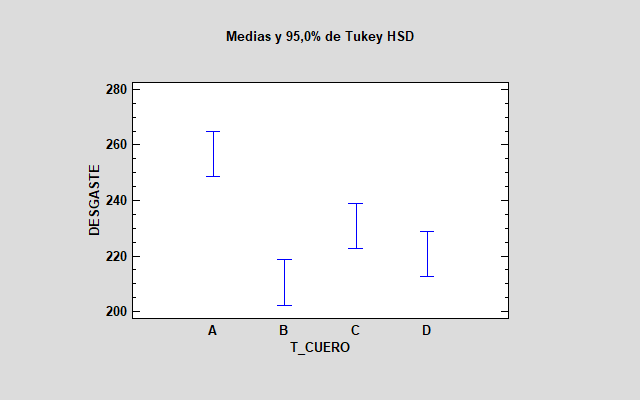